In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
cd ../analysis/

/srv/data/home/jlee782/segmentation/analysis


In [5]:
%load_ext autoreload
%autoreload 2
from preprocessing import *

/home/jlee782/.local/lib/python2.7/site-packages/pandas/io/parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  ParserWarning)


In [6]:
bad_worker_records_df = pd.read_csv("bad_worker_records.csv",index_col=0)
bad_worker_records = bad_worker_records_df.as_matrix()

In [7]:
easy_task_predicted_by_algo = [i for i in object_lst if i not in bad_worker_records_df["objid"].unique()]
print "easy tasks predicted by algo:",easy_task_predicted_by_algo
print "human-labelled easy tasks:",easy_tasks

easy tasks predicted by algo: [2, 3, 5, 6, 7, 8, 11, 12, 13, 14, 16, 17, 19, 23, 24, 25, 28, 32, 33, 36, 37, 38, 39, 43, 44, 45, 46]
human-labelled easy tasks: [2, 3, 5, 6, 11, 12, 13, 14, 16, 17, 19, 23, 24, 26, 36, 37, 38, 39, 43, 44, 45, 46]


__Uncaught errors: __
  - object 7, 8, 25 are type 2 errors uncaught because many workers are voting on bad regions
  - object 26 is supposed to be a two two error, but we mislabelled as easy (so our algo actually detect this!)
  - object 28, 32,33 has undetected type 2 errors (flower vase examples, very noisy)

In [8]:
type_one_task_ambiguity

[15, 20, 22, 27, 31, 40, 41, 42, 47]

In [9]:
bad_worker_records_df[bad_worker_records_df["error type"]==1]["objid"].unique()

array([15, 18, 20, 21, 22, 27, 29, 31, 42, 47])

__Other mistakes: __
 - Object 29,31 (vase) unable to identify type 2 error 
 - but strangely object 30 (also flower vase) seems to do a good job at identifying type 2 error
 - Object 47 unable to identify type 2 error

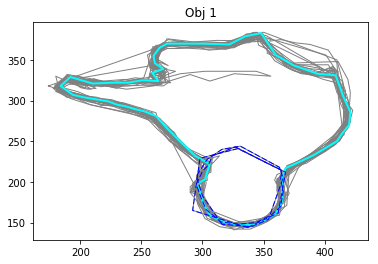

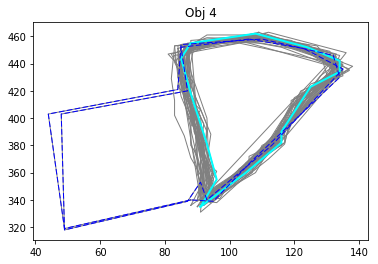

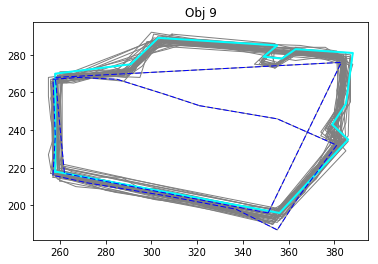

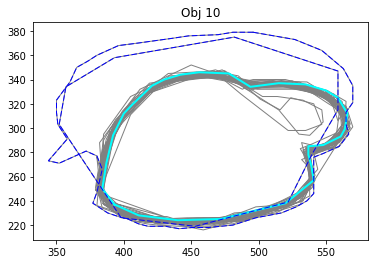

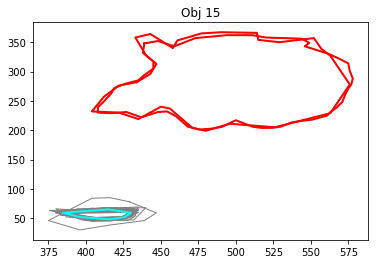

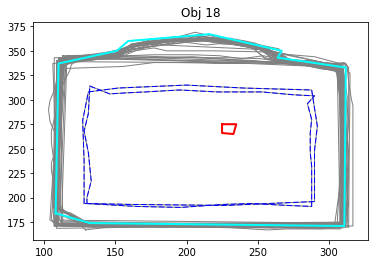

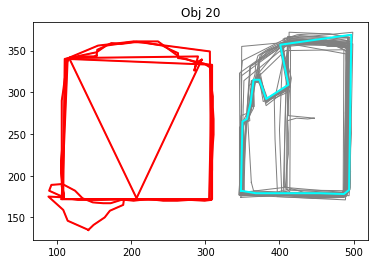

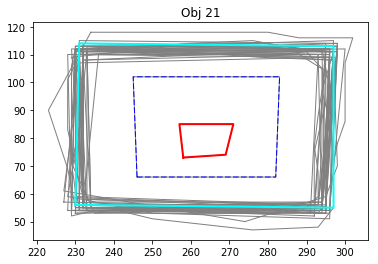

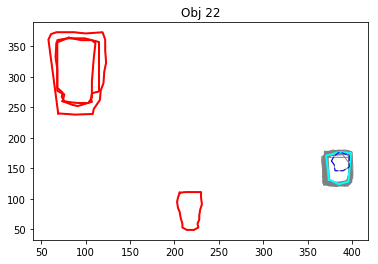

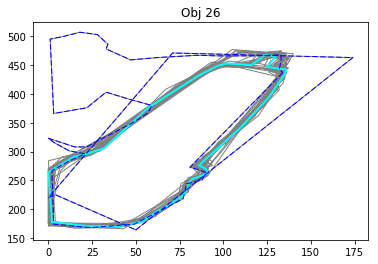

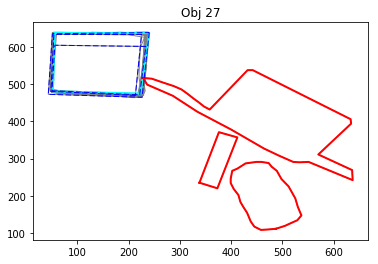

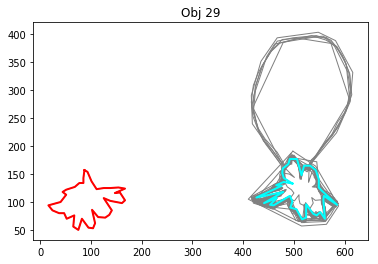

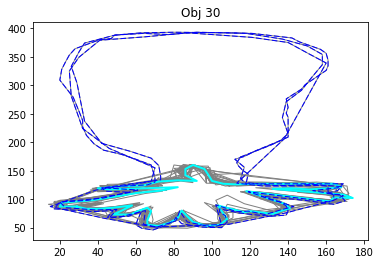

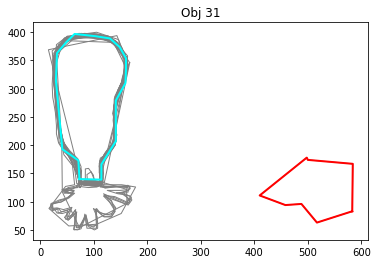

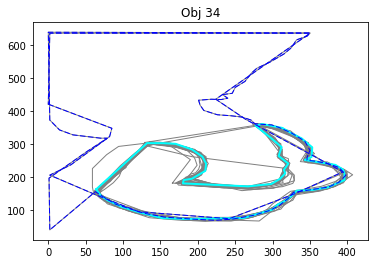

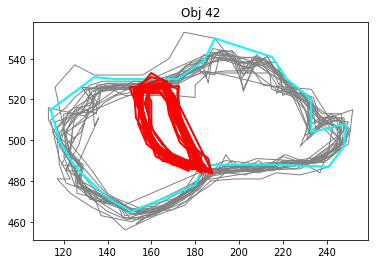

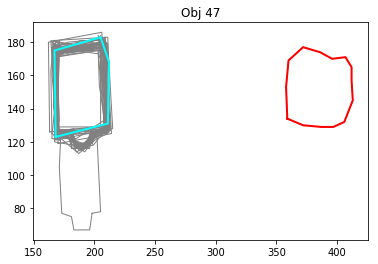

In [16]:
worker_lst = list(set(bad_worker_records[:,0]))
bad_worker_records = np.array(bad_worker_records)
curr_obj = -1
for bad_worker_record in bad_worker_records:
    if curr_obj!=bad_worker_record[0]:
        #print "here"
        curr_obj = bad_worker_record[0]
        bb_objects = bb_info[bb_info["object_id"]==curr_obj]
        plt.figure()
        plt.title("Obj {}".format(curr_obj))
        for widx in bb_objects.worker_id.unique():
            plot_coords(worker_polygon(bb_objects,widx),reverse_xy=True,color="grey",fill_color="")
        plot_coords(ground_truth_T(curr_obj),color="cyan",lw=2,reverse_xy=True,fill_color="")

    widx = bad_worker_record[1]
    err_type = bad_worker_record[2]
    if err_type==1:
        plot_coords(worker_polygon(bb_objects,widx),reverse_xy=True,color="red",lw=2,fill_color="")
    elif err_type==2:
        plot_coords(worker_polygon(bb_objects,widx),reverse_xy=True,color="blue",linestyle='--',fill_color="")